#### <h1> <center> ENSF 519.01 Programming Fundamentals for Data Engineers </center></h1>
<h2> <center> Assignment 8: Visualization (100 marks)</center></h2>
<h3> <center> Due: Sunday 2nd Dec Midnight. To be submitted on D2L. </center></h3>


Edit this file and write your solutions to the problems in sections specified with `# Your solution goes here`. Test your code and when you were done, download this notebook as an `.ipynb` file and submit it to D2L. To get this file, in Jupyter notebook you can go to File -> Download as -> Notebook(.ipynb)

In this assignment, you are going to work on one of the Kaggle contests for data analysts, and you actually have the chance to really participate in the contest and win couple of grands !

__The challenge objective__: Tell a data story about a subset of the data science community represented in this survey, through a combination of both narrative text and data exploration. A “story” could be defined any number of ways, and that’s deliberate. The challenge is to deeply explore (through data) the impact, priorities, or concerns of a specific group of data science and machine learning practitioners. That group can be defined in the macro (for example: anyone who does most of their coding in Python) or the micro (for example: female data science students studying machine learning in masters programs). This is an opportunity to be creative and tell the story of a community you identify with or are passionate about!

Check Out the Kaggle page for this contest: https://www.kaggle.com/kaggle/kaggle-survey-2018/home?utm_medium=email&utm_source=intercom&utm_campaign=dsml-survey2018

In this assignemnt, we ask you for several analyzes using data visualizations, and then you have the chance to improve it and make a nice story and submit it to Kaggle before the deadlines. 

__ note :__ You can use any visualization libraries in python for the following Figures. 

To start your story, reproduce the following 3 figures: 

### Fig1. (30pts)

As a first step, read the survey data from " multipleChoiceResponses.csv " and load it to a pandas dataframe. To observe the distribution of participants, plot the number of participants from different countries. Also to see which countries have the youngest developers, plot the participant in age range of [18-21],[22-24],[25-29] and show all the four bars for each country. 
<div class="alert alert-block alert-danger">
<b>Note:</b> <br>
Your output must be the same exact figure as below. Legend, labels, annotations(arrows), and titles has points. 
</div>

#### Add your story here: 

Try to analyze your figure and start the narrative. 

__You're Story__ : ....

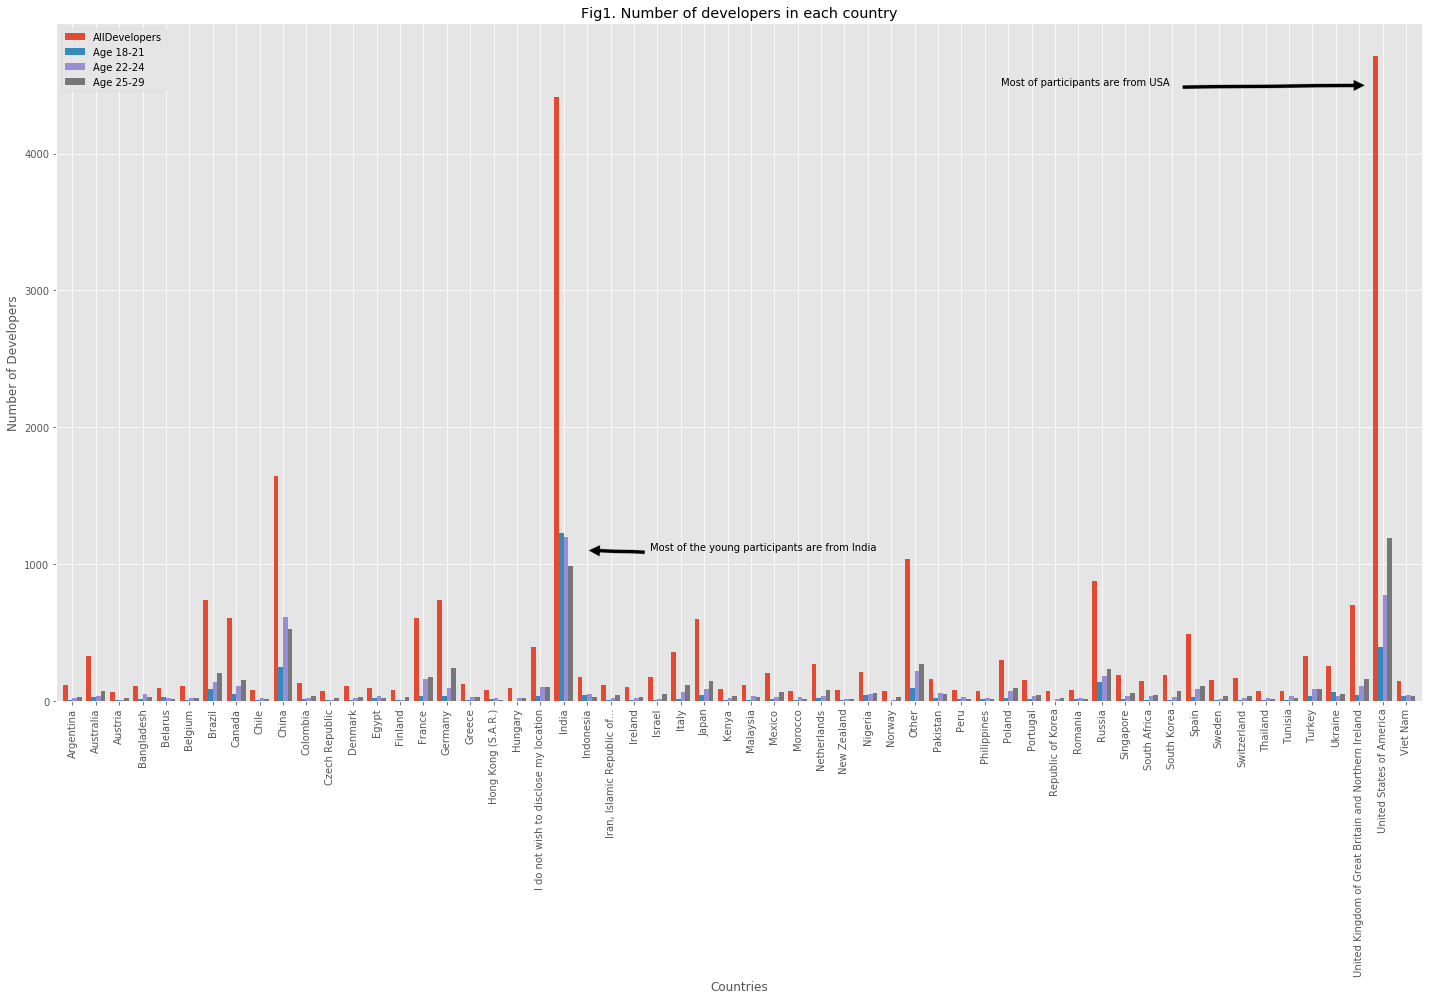

In [5]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('multipleChoiceResponses.csv', header=None, skiprows=[0, 1], usecols=[3, 4])
sums = dict()
fig, ax = plt.subplots()
countries = list()
for index, row in data.iterrows():
    if sums.get(row[4], None) == None:
        sums[row[4]] = dict()
    if sums[row[4]].get(row[3], None) != None:
        sums[row[4]][row[3]] = sums[row[4]].get(row[3], 0)+1
    if sums[row[4]].get(row[3], None) == None:
        sums[row[4]][row[3]] = sums[row[4]].get(row[3], 0)+1
for country in sums.keys():
    countries.append(country)
countries.sort()
ax.set_ylabel('Number of Developers')
ax.set_xlabel('Countries')
ax.set_title('Fig1. Number of developers in each country')
barw = 0.2
age1821 = list()
age2224 = list()
age2529 = list()
allage = list()
index = np.arange(len(countries))
for i in countries:
    age1821.append(sums[i]['18-21'])
    age2224.append(sums[i]['22-24'])
    age2529.append(sums[i]['25-29'])
    allage.append(sum(sums[i].values()))
rects1 = ax.bar(index, allage, barw, label='AllDevelopers')
rects2 = ax.bar(index+barw, age1821, barw, label='Age 18-21')
rects3 = ax.bar(index+barw+barw, age2224, barw, label='Age 22-24')
rects4 = ax.bar(index+(3*barw), age2529, barw, label='Age 25-29')
ax.legend()
ax.set_xticks(index + 3*barw / 2)
ax.set_xticklabels(countries)
plt.xticks(rotation=90)
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (20, 12)
fig.tight_layout()
ax.margins(x=0.005)
ax.annotate('Most of the young participants are from India', xy=(22.2, 1100), xytext=(25, 1100), arrowprops=dict(facecolor='black', shrink=0.05),)
ax.annotate('Most of participants are from USA', xy=(56, 4500), xytext=(40, 4500), arrowprops=dict(facecolor='black', shrink=0.05),)
plt.show()

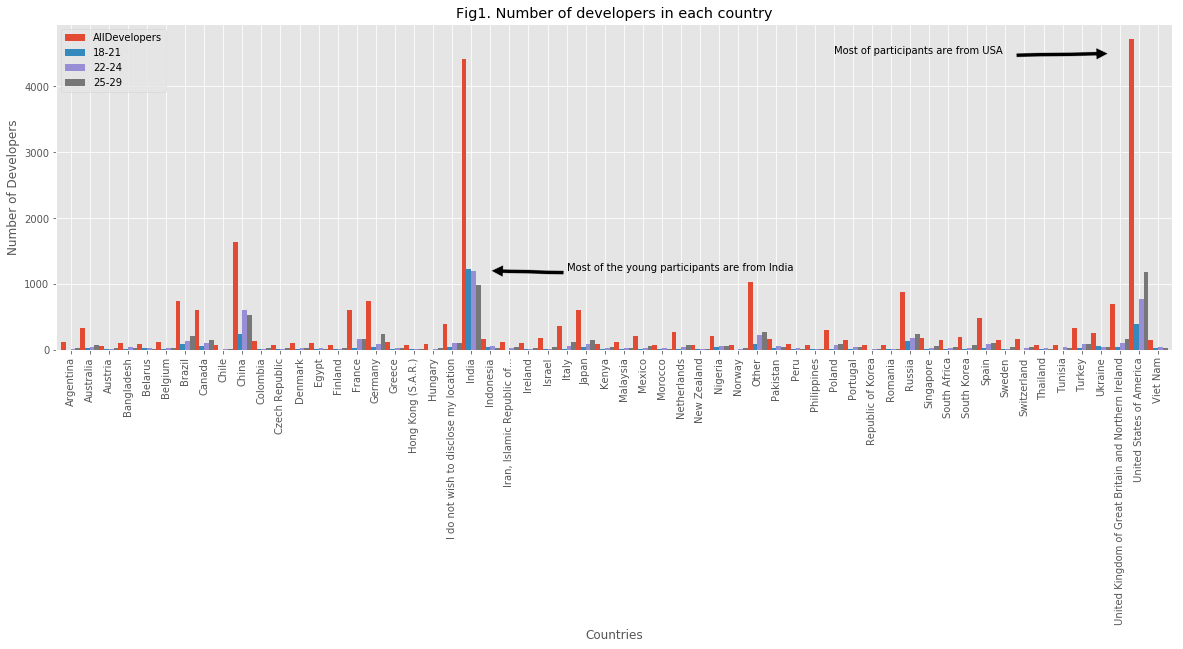

In [2]:
# Your solution goes here

### Fig2 (30pts)

In this step, you're going to study the corelation between experience and income of people. So reproduce the following scatter plot in which the circles show each group of people and the size of the circle shows the number of participants in that group. 

#### Continue the Story:

Analyze Fig2 and give more insight about the dataset. 

__rest of the story __ : ....

<div class="alert alert-block alert-danger">
<b>Note:</b> <br>
try to reproduce the same following figure. Side bar, Labels, and Title has points. 
</div>

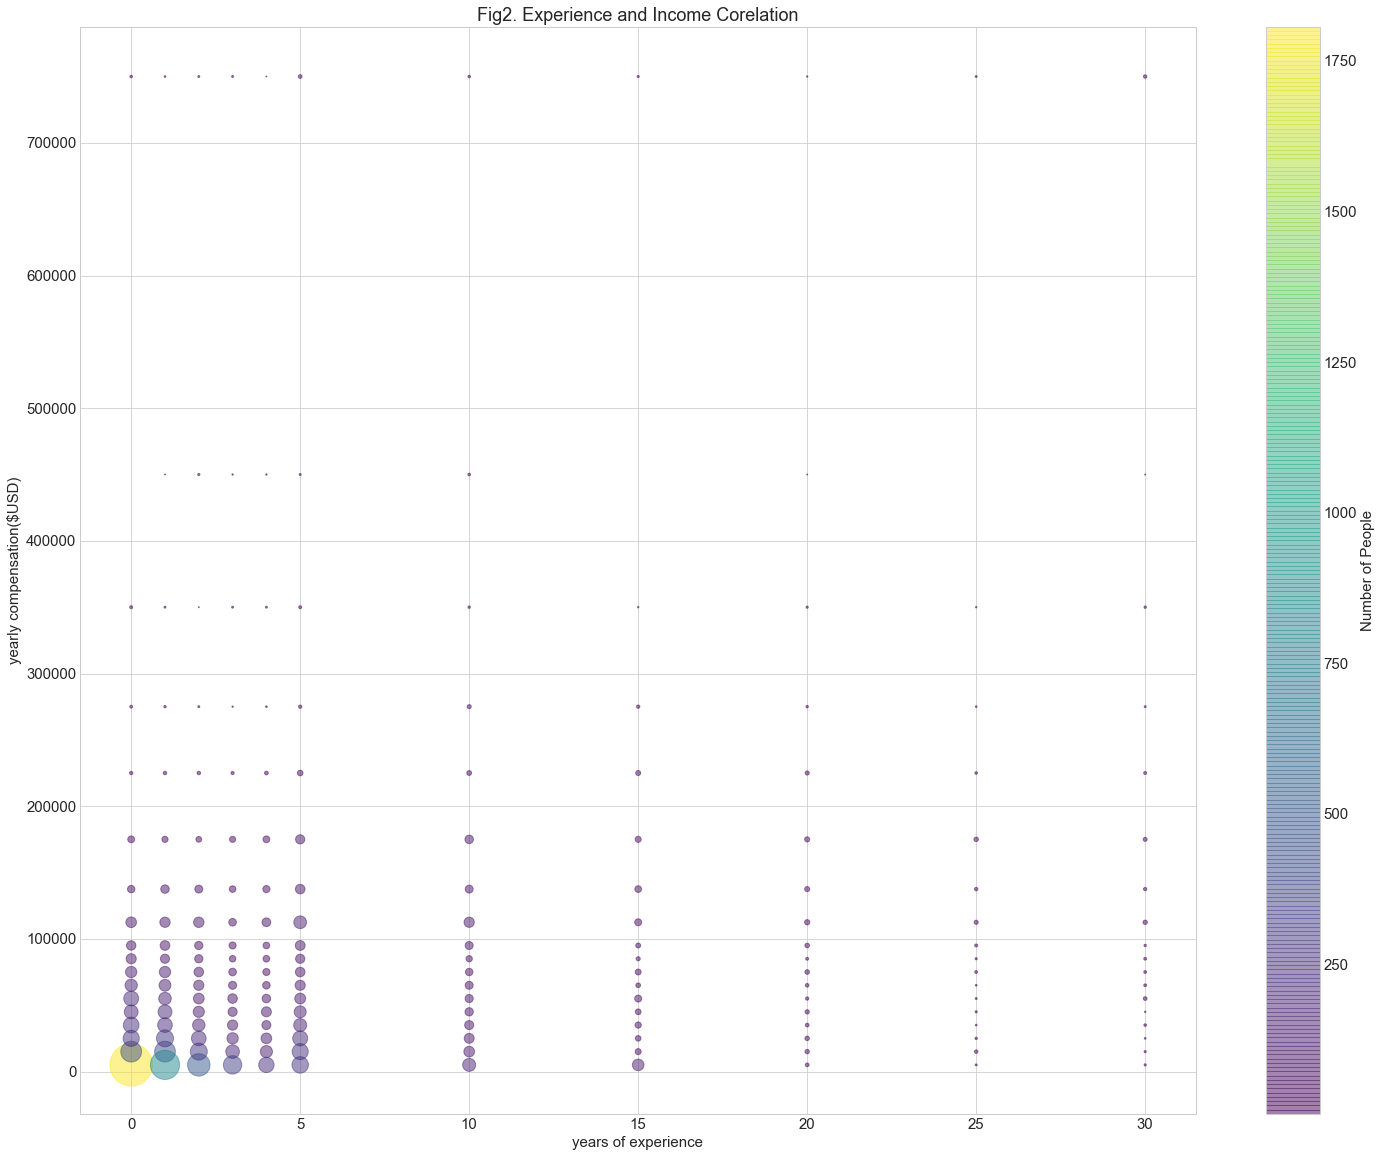

In [32]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('multipleChoiceResponses.csv', header=None, skiprows=[0, 1], usecols=[11, 12])
exp = dict()
for index, row in data.iterrows():
    if row[12] == 'I do not wish to disclose my approximate yearly compensation' or pd.isna(row[11]) or pd.isna(row[12]):
        continue
    if exp.get(row[11], None) == None:
        exp[row[11]] = dict()
    if exp[row[11]].get(row[12], None) != None:
        exp[row[11]][row[12]] = exp[row[11]].get(row[12], 0)+1
    if exp[row[11]].get(row[12], None) == None:
        exp[row[11]][row[12]] = exp[row[11]].get(row[12], 0)+1
year_exp = list()
for years in exp.keys():
    year_exp.append(years)
a = re.compile('^([0-9]*)-[0-9]*')
fixed_exp = list()
for i in year_exp:
    fixed_exp += a.findall(i)
year_expint = list()
for i in fixed_exp:
    year_expint.append(int(i))
year_expint.append(30)
tuples = zip(year_expint, year_exp)
tuples = sorted(tuples, key=lambda x: x[0])
data = list()
for i in tuples:
    data.append(exp[i[1]])
b = re.compile('^[0-9]*-([0-9,]*)')
listofyears=list()
years = 0
for i in data:
    temp = dict()
    for j in i.keys():
        income = re.split('-',j)
        income[0]+='000'
        if len(income)>1:
            income[1]=re.sub('[,]','',income[1])
        if income[0]=='500,000+000':
            income[0]= '750000'
            income.append('750000')
        income[0]=int(income[0])
        income[1]=int(income[1])
        incomeint = int((income[0]+income[1])/2)
        temp[incomeint]=i[j]
    temp['year']=years
    if years <5:
        years+=1
    else:
        years+=5
    listofyears.append(temp)
colour=list()
xval= list()
yval = list()
for m in listofyears:
    for i in m.keys():
        if i != 'year':
            colour.append(m[i])
            xval.append(m['year'])
            yval.append(i)
plot = plt.scatter(xval, yval, s=colour,c=colour, cmap='viridis', alpha=0.5)
cbar = plt.colorbar(plot)
cbar.set_label('Number of People')
plt.xlabel("years of experience")
plt.ylabel("yearly compensation($USD)")
plt.title("Fig2. Experience and Income Corelation")
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (20, 15)
plt.show()

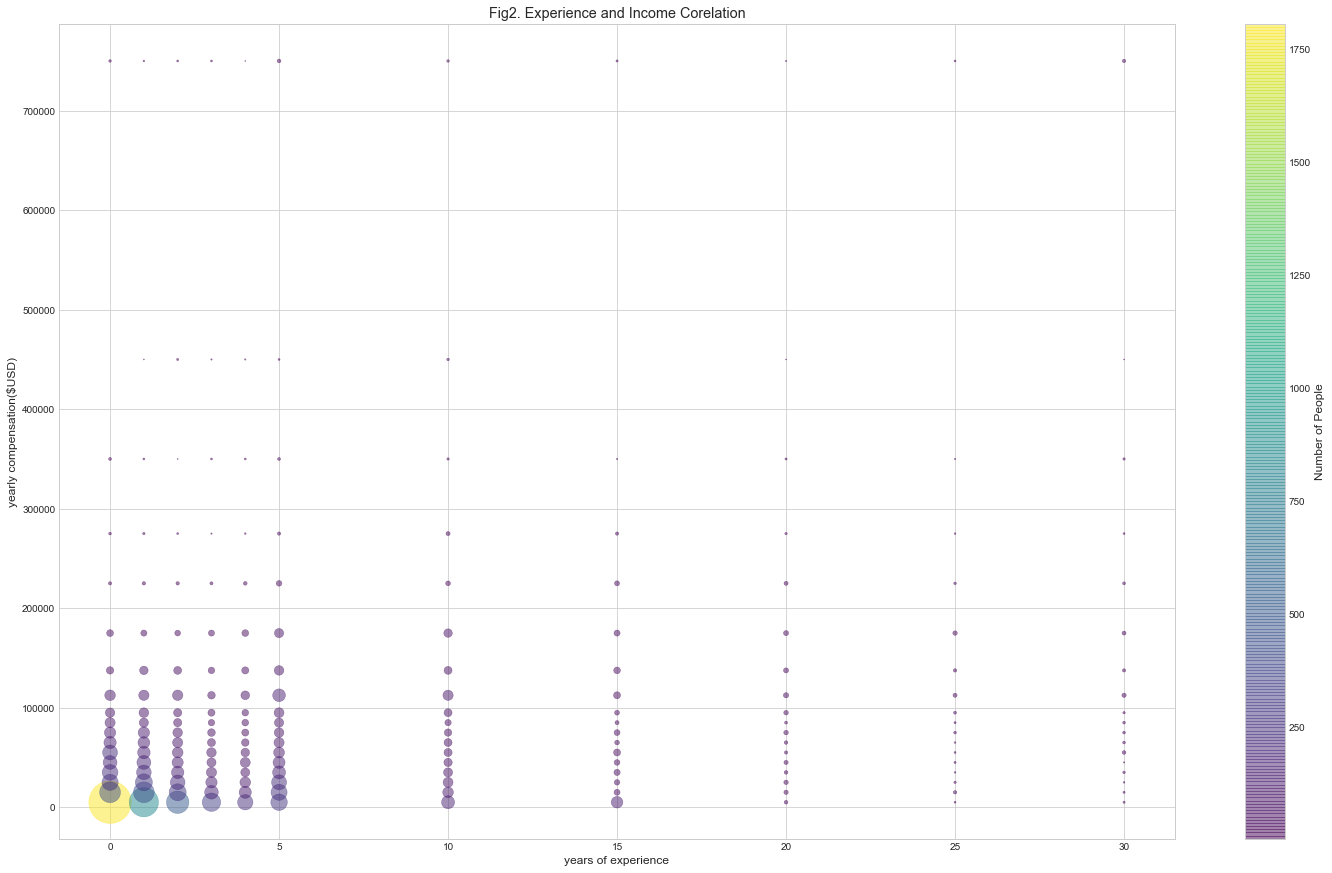

In [24]:
# Your solution goes here

### Fig3 (40 pts)

In this part, you should plot two pie charts in the same window. The first chart shows the undergraduate major of the participants. You need to slice the biggest group in the pie chart. 

In the second pie chart, we want to see how many users use AWS, GCP and Azure among all other cloud computing services. So reproduce the pie chart that shows the usage percentage of these three, among all other (make sure to consider the participants who do not use any cloud providers too). 

#### Continue the Story:

Analyze Fig3, 4 and give more insights about the dataset. 

__rest of the story __ : ....

<div class="alert alert-block alert-danger">
<b>Note:</b> <br>
Try to reproduce the same following figures. Labels and Title, picking good visible colors and font size, showing the percentage, Title and showing the two figures in the same window have all points.  
</div>

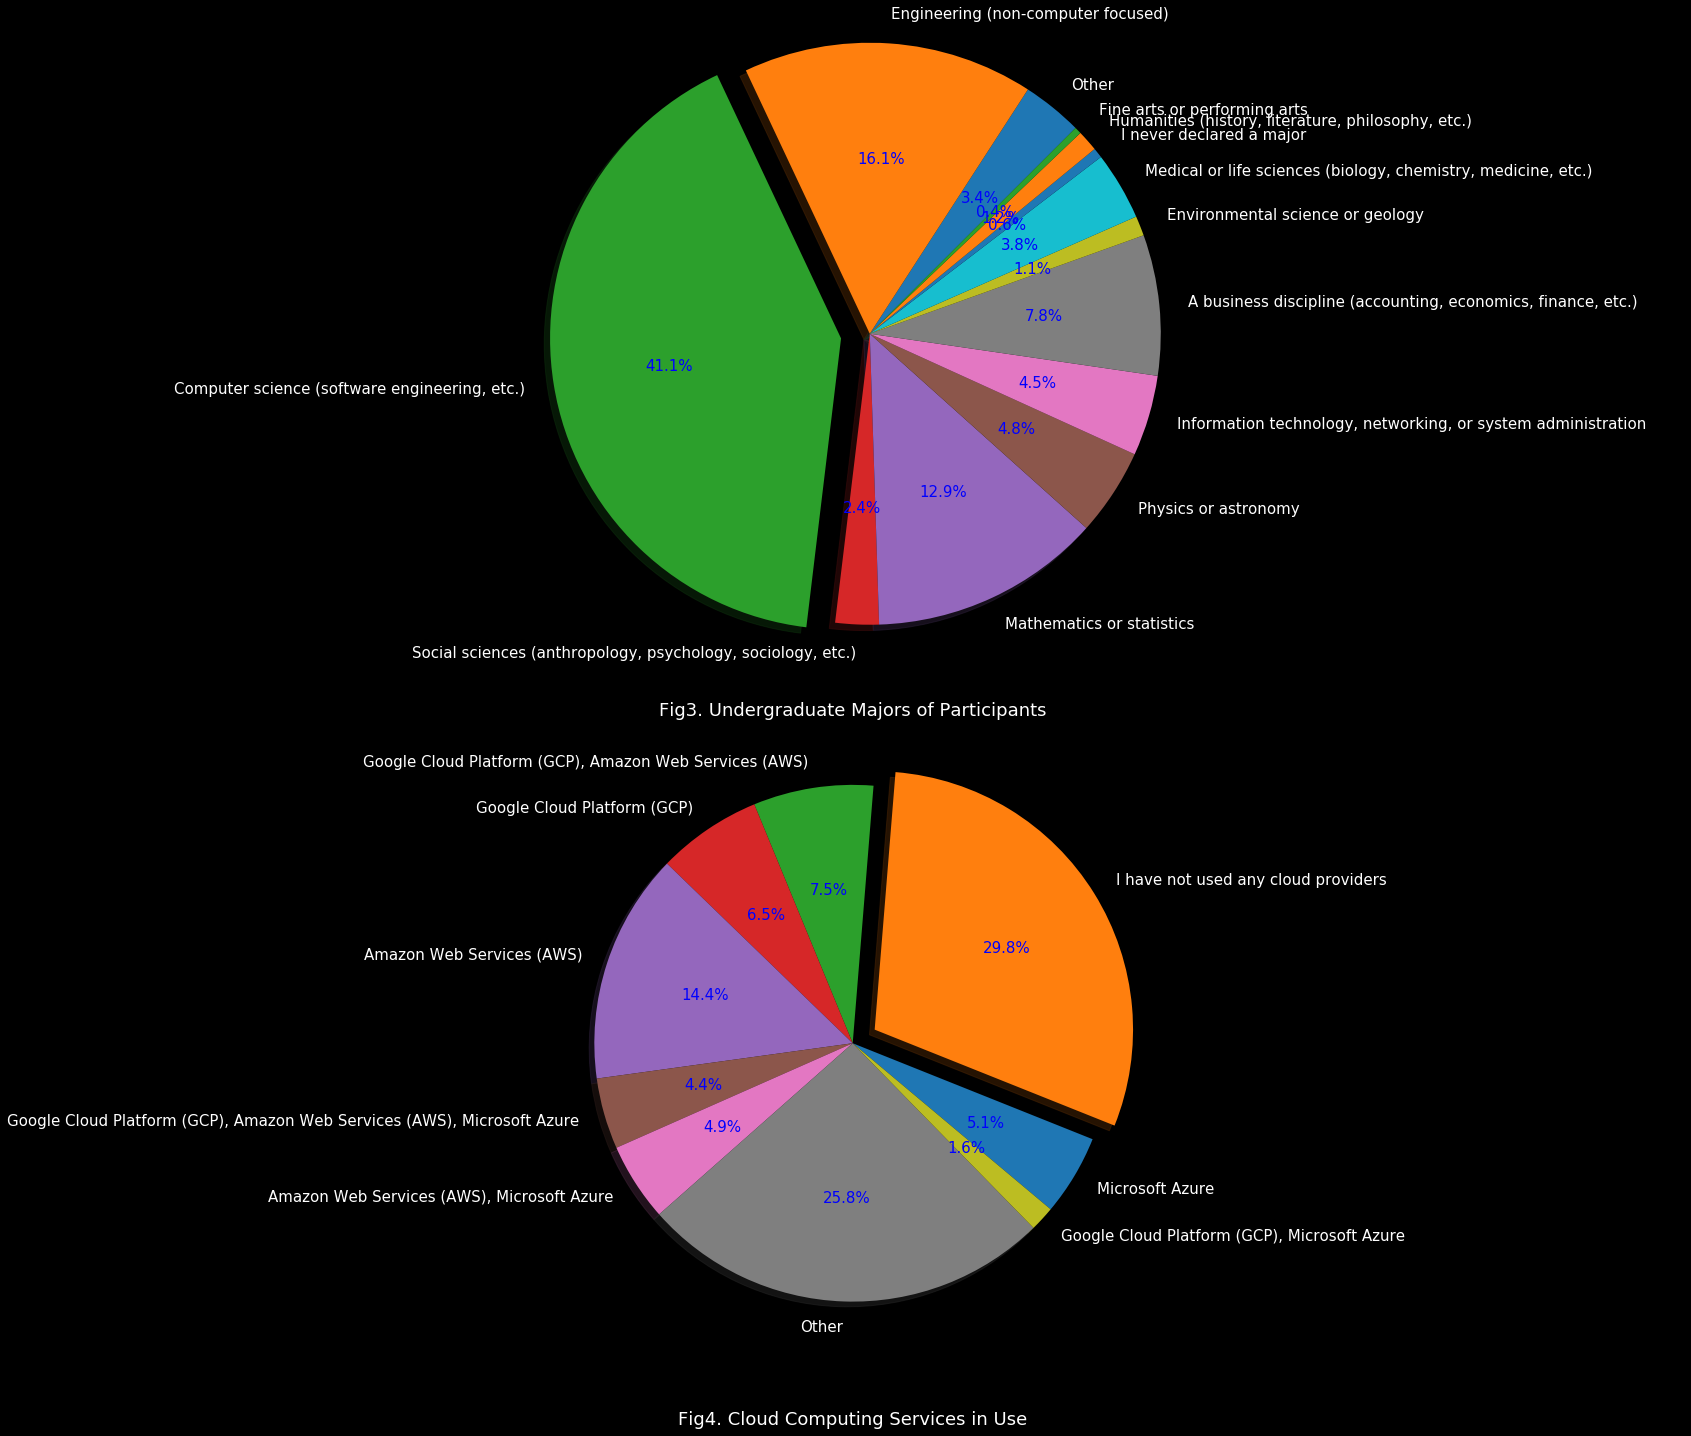

In [27]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

datafirst = pd.read_csv('multipleChoiceResponses.csv', header=None, skiprows=[0, 1], usecols=[6])
datasec = pd.read_csv('multipleChoiceResponses.csv', header=None, skiprows=[0, 1], usecols=[57, 58, 59, 60, 61, 62, 63, 64])
datasec
majors = dict()
webserv = dict()
maj = list()
numbers = list()
for index, row in datasec.iterrows():
    if pd.isna(row[62]) == False:
        webserv['I have not used any cloud providers'] = webserv.get('I have not used any cloud providers', 0)+1
        continue
    listofservices = ''
    if pd.isna(row[57]) == False:
        listofservices += row[57]+', '
    if pd.isna(row[58]) == False:
        listofservices += row[58]+', '
    if pd.isna(row[59]) == False:
        listofservices += row[59]+', '
    if len(listofservices) < 1:
        webserv['Other'] = webserv.get("Other", 0)+1
        continue
    listofservices = listofservices[:-2]
    webserv[listofservices] = webserv.get(listofservices, 0)+1
webserv
labels2 = list()
size2 = list()
for i in webserv.keys():
    labels2.append(i)
for i in labels2:
    size2.append(webserv[i])
for index, row in datafirst.iterrows():
    if pd.isna(row[6]):
        continue
    majors[row[6]] = majors.get(row[6], 0)+1
for i in majors.keys():
    maj.append(i)
for i in maj:
    numbers.append(majors[i])
labels = maj
sizes = numbers

explode = (0, 0, 0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
explode2 = (0, 0.1, 0, 0, 0, 0, 0, 0, 0)

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 15}
plt.rc('font', **font)
fig1, (ax1, ax2) = plt.subplots(2, 1)
plt.rcParams['figure.facecolor'] = 'black'
ax1.patch.set_facecolor('black')
ax2.patch.set_facecolor('black')
a, b, texts = ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', textprops=dict(color="white"), shadow=True, startangle=45)
for i in texts:
    i.set_color('blue')
a, b, texts = ax2.pie(size2, explode=explode2, labels=labels2, autopct='%1.1f%%', textprops=dict(color="white"), shadow=True, startangle=-40)
for i in texts:
    i.set_color('blue')
ax1.axis('equal')
ax1.set_title('Fig3. Undergraduate Majors of Participants', y=-0.1, color='w')
ax2.set_title('Fig4. Cloud Computing Services in Use', y=-0.1, color='w')
plt.tight_layout()
plt.rcParams['figure.figsize'] = (25, 20)
plt.show()